# Levarage PubChem IDs for predicting the Dopamine D3 receptor antagonists. 

### Content   <a name="content"></a>

1. [Upload and analyse PubChem BioAssay AID 652054 on D3 receptor ](#1)
2. [Create a data frame with CIDs, SIDs and targets](#2)
3. [Upload and analyse PubChem BioAssay AID 1996 on water solubility ](#3)
4. [Create the final data frame, crossing the data frame that holds the targets with the water solubility data frame](#4)
5. [Ensure an equal number of classes in the test sets](#5)
6. [Scaling](#6)
7. [Balancing](#7)
8. [Machine Learning](#8)
9. [Cross validation](#9)
10. [Scrutinise for overfitting](#10)
11. [Hyperparameter tuning](#11)
12. [Final ML model](#12)
13. [Plot the learning curve ans AUC](#13)
14. [Confusion matrix, classification report](#14)

## Upload and analyse PubChem BioAssay AID 652054 on D3 receptor <a name="1"></a>

In [1]:
import pandas as pd 

# load the BioAssay PubChem AID 652054 dataset
df_targets = pd.read_csv('1.D3_PubChem_AID_652054.csv', low_memory=False)

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of the data frame: ', df_targets.shape)
df_targets.head()

Shape of the data frame:  (364367, 26)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Activity_Score,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC;;
0,1,124755913,53301729.0,COC1=C(C=C(C=C1)C2=C(NC(=C2C(=O)C3=CC=C(C=C3)B...,Active,90,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.0809,-25.9891,-73.0809,NaN,QC'd by Alexander Doemling - Univ. of Pittsbur...
1,2,124755904,53301720.0,COC1=C(C=C(C=C1)C2=C(NC(=C2C(=O)C3=CC=CC=C3)N)...,Active,90,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.7325,-20.3722,-66.7325,NaN,QC'd by Alexander Doemling - Univ. of Pittsbur...
2,3,125306376,53383657.0,C1CN(CCN1)C(=O)C2=C(SC(=C2)C3=CC=CC=C3)N,Active,90,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-54.0946,-1.5577,-54.0946,NaN,QC'd by Alexander Doemling - Univ. of Pittsbur...
3,4,124753928,53299937.0,C1=CC=C(C=C1)C(=O)C2=C(C(=C(N2)N)C(=O)N)C3=CC=...,Active,90,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-52.0484,-2.9351,-52.0484,NaN,QC'd by Alexander Doemling - Univ. of Pittsbur...
4,5,124755898,53301714.0,C1=CC=C(C=C1)C(=O)C2=C(C(=C(N2)N)C(=O)N)C3=CC=...,Inconclusive,50,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.0771,-45.0704,-43.0771,NaN,QC'd by Alexander Doemling - Univ. of Pittsbur...


In [2]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364367 entries, 0 to 364366
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             364367 non-null  int64  
 1   SID                            364367 non-null  int64  
 2   CID                            364366 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  364366 non-null  object 
 4   target                         364367 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         364367 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           364367 non-null  object 
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Phenotype                      0 non-null       float64
 9   Potency                        0 non-null       float64
 10  Efficacy                       0 non-null       float64
 11  Analysis Comment               0 non-null       float64
 12  Activity_Score                

In [3]:
# Remove duplicates 
df_targets.drop_duplicates()
df_targets.shape  # 353737 means no duplicates

(364367, 26)

In [4]:
# Remove compounds with missing CID-s
df_targets = df_targets[df_targets['CID'].notna()]
df_targets.shape

(364366, 26)

In [5]:
# Remove compounds with missing SID-s
df_targets = df_targets[df_targets['SID'].notna()]
df_targets.shape

(364366, 26)

In [6]:
import numpy as np
# Turn CID float data type into integer
df_targets['CID'] = df_targets['CID'].astype(np.int64) 
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364366 entries, 0 to 364366
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             364366 non-null  int64  
 1   SID                            364366 non-null  int64  
 2   CID                            364366 non-null  int64  
 3   PUBCHEM_EXT_DATASOURCE_SMILES  364366 non-null  object 
 4   target                         364366 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         364366 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           364366 non-null  object 
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Phenotype                      0 non-null       float64
 9   Potency                        0 non-null       float64
 10  Efficacy                       0 non-null       float64
 11  Analysis Comment               0 non-null       float64
 12  Activity_Score                 0 no

In [7]:
# Analise the Active compounds
df_Active = df_targets[df_targets['target']=='Active']
df_Active.describe(include='all')

,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Activity_Score,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC;;
count,9117.000000,9.117000e+03,9.117000e+03,9117,9117,9117.0,9117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9117.000000,9103.000000,9117.000000,1651.000000,9117
unique,NaN,NaN,NaN,9106,1,NaN,9117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
top,NaN,NaN,NaN,COC1=CC=CC=C1N2CCN(CC2)CC(COC3=CC=CC=C3CC=C)O.Cl,Active,NaN,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by DPISMR;;
freq,NaN,NaN,NaN,2,9117,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1751
mean,162265.400351,3.639120e+07,1.532145e+07,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.923504,-24.694481,-63.138472,-67.655262,NaN
std,105988.247321,3.204856e+07,2.732962e+07,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.107738,29.894778,30.653640,13.077494,NaN
min,1.000000,8.421370e+05,1.318000e+03,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-272.950000,-177.089000,-272.950000,-135.893000,NaN
25%,84528.000000,1.473833e+07,1.825654e+06,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.129700,-38.729950,-80.703900,-75.776600,NaN
50%,131291.000000,2.480030e+07,3.711067e+06,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.154900,-18.666400,-63.401000,-65.223700,NaN
75%,264357.000000,4.971666e+07,1.619570e+07,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-56.753100,-3.961350,-52.840000,-56.832350,NaN


In [8]:
# Amalise the Inactive compound
df_Inactive = df_targets[df_targets['target']=='Inactive']
df_Inactive.describe(include='all')

,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,target,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Activity_Score,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 2.300 uM,Activity at 11.50 uM,Activity at 57.50 uM,Compound QC;;
count,339862.000000,3.398620e+05,3.398620e+05,339862,339862,339862.0,339862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,339862.000000,338542.000000,339862.000000,31187.000000,339862
unique,NaN,NaN,NaN,339611,1,NaN,339862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105
top,NaN,NaN,NaN,C1(C(C(C(C(C1O)O)O)O)O)O,Inactive,NaN,http://assay.nih.gov/htsws/rest/display/D3-arr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Enamine;;
freq,NaN,NaN,NaN,3,339862,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49360
mean,183533.228090,3.687369e+07,1.270212e+07,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.374578,0.004487,1.280095,2.534716,NaN
std,105001.556434,2.854622e+07,2.386607e+07,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.295728,14.894771,16.226770,19.479251,NaN
min,10.000000,8.421210e+05,6.000000e+00,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.999900,-189.364000,-115.769000,-29.995000,NaN
25%,93427.250000,1.740965e+07,1.810025e+06,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.744450,-8.068375,-8.772050,-8.890300,NaN
50%,185712.500000,2.483230e+07,3.452006e+06,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655800,0.103150,0.453550,1.966500,NaN
75%,274248.750000,4.973590e+07,1.609912e+07,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.277550,7.974075,9.219375,11.600950,NaN


[<a href="#content">Back to top</a>]

## Create a data frame with CIDs, SIDs and targets <a name="2"></a>

In [9]:
# Create a data frame containing the classification targets
df_targets = df_targets [['CID', 'SID', 'target']]

# Display the data frame
print('Shape of df_targets : ', df_targets .shape)
df_targets .head()

Shape of df_targets :  (364366, 3)


,CID,SID,target
0,53301729,124755913,Active
1,53301720,124755904,Active
2,53383657,125306376,Active
3,53299937,124753928,Active
4,53301714,124755898,Inconclusive


In [10]:
# Check the classes in the bioassay
df_targets['target'].value_counts()

target
Inactive        339862
Inconclusive     15387
Active            9117
Name: count, dtype: int64

In [11]:
# Remove the Inconclusive samples 
df_targets = df_targets[df_targets['target']!='Inconclusive']
df_targets['target'].value_counts()

target
Inactive    339862
Active        9117
Name: count, dtype: int64

In [12]:
# Set the binary targets to "1" for an active antagonist and "0" for inactive 
df_targets = df_targets.copy()

# Create a dictionary
targets = {'Active' : 1,
           'Inactive' : 0}

# Replace the names with binary values set up in the dictionary targets
df_targets.target = [targets[item] for item in df_targets.target]

# Check how many unique values there are in the 'target' column
print('Unique values: ', df_targets['target'].unique())

# Count each of the binary targets
df_targets['target'].value_counts()

Unique values:  [1 0]


target
0    339862
1      9117
Name: count, dtype: int64

In [13]:
# Display the data frame
print('Shape of the df_targets: ', df_targets.shape)
df_targets.head()

Shape of the df_targets:  (348979, 3)


,CID,SID,target
0,53301729,124755913,1
1,53301720,124755904,1
2,53383657,125306376,1
3,53299937,124753928,1
9,53301739,124755923,0


In [14]:
# Creat a dataframe with full set of target 1 for latter use
df_targets_1 = df_targets[df_targets['target']==1]

[<a href="#content">Back to top</a>]

## Upload and analyse PubChem BioAssay AID 1996 on water solubility <a name="3"></a>

In [15]:
# Load data from PubChem BioAssay AID 1996 
df_solubility = pd.read_csv('0.Solubility_pubChem_AID_1996.csv')

# Display the data frame
print('Shape of df_solubility: ', df_solubility.shape)
df_solubility.head()

Shape of df_solubility:  (57859, 30)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Solubility at pH 7.4_Qualifier_Mean,Solubility at pH 7.4_Mean,Test Concentration_1,Solubility at pH 7.4_Qualifier_1,Solubility at pH 7.4_1,Solubility at pH 7.4_Comment_1,Solubility of Astemizole at pH 7.4_Qualifier_1,Solubility of Astemizole at pH 7.4_1,Solubility of Sulfamethizole at pH 7.4_Qualifier_1,Solubility of Sulfamethizole at pH 7.4_1,Solubility of Imipramine HCl at pH 7.4_Qualifier_1,Solubility of Imipramine HCl at pH 7.4_1,Test Concentration_2,Solubility at pH 7.4_Qualifier_2,Solubility at pH 7.4_2,Solubility at pH 7.4_Comment_2,Solubility of Astemizole at pH 7.4_Qualifier_2,Solubility of Astemizole at pH 7.4_2,Solubility of Sulfamethizole at pH 7.4_Qualifier_2,Solubility of Sulfamethizole at pH 7.4_2,Solubility of Imipramine HCl at pH 7.4_Qualifier_2,Solubility of Imipramine HCl at pH 7.4_2
0,1,24826444,2374148,COC1=CC=C(C=C1)OCC2=NNC(=S)N2N,Active,40,NaN,NaN,=,10.85,200,<,0.1,Below LOQ,=,14.2,>,40.5,>,47.5,200.0,=,21.6,NaN,=,27.7,>,40.5,>,47.5
1,2,49669186,5295761,CC1=CC(=C(C=C1)NC2=NC3=CC=CC=C3N4C2=NN=C4)Cl,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,49669768,22431387,CC1=CC(=CC=C1)CCNC2=NC3=C(C=C(C=C3)C)N4C2=NN=C4,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,12.3,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8139962,14296,CC1=C(N=C(C(=N1)C)C)C,Inactive,0,NaN,NaN,<,0.10,200,<,0.1,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,24803435,865684,CC1=CC2=NC(=C(C=C2C=C1)C#N)NC3=CC=CC=C3OC,Inactive,0,NaN,NaN,<,0.20,200,<,0.2,Below LOQ,=,11.4,>,40.5,>,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57859 entries, 0 to 57858
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PUBCHEM_RESULT_TAG                                  57859 non-null  int64  
 1   SID                                                 57859 non-null  int64  
 2   CID                                                 57859 non-null  int64  
 3   PUBCHEM_EXT_DATASOURCE_SMILES                       57859 non-null  object 
 4   OUTCOME                                             57859 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE                              57859 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL                                0 non-null      float64
 7   PUBCHEM_ASSAYDATA_COMMENT                           0 non-null      float64
 8   Solubility at pH 7.4_Qualifier_Mean                 57859 non-null  object 


In [17]:
# Create the desired data frame with CID and SID for sifting 
df_solubility = df_solubility[['SID', 'CID']]

# Display the data frame
print('Shape of the data frame: ', df_solubility.shape)
df_solubility.head()

Shape of the data frame:  (57859, 2)


,SID,CID
0,24826444,2374148
1,49669186,5295761
2,49669768,22431387
3,8139962,14296
4,24803435,865684


[<a href="#content">Back to top</a>]

## Create the final data frame, crossing the data frame that holds the targets with the water solubility data frame  <a name="4"></a>

In [18]:
# Sift the main data frame with targets using the solubility data frame 
df = pd.merge(df_targets, df_solubility, on=["CID", "SID"])

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (55780, 3)


,CID,SID,target
0,24747098,49644873,1
1,24746949,49643155,1
2,3217171,49644315,1
3,3218131,24797390,1
4,4763,51087546,1


In [19]:
# Count values of the sifted data frame 
df['target'].value_counts()

target
0    54951
1      829
Name: count, dtype: int64

In [20]:
# Create a data frame with target 0
df_0 = df[df['target']==0]

# Concatenate the sifted target 0 with the original target 1
df = pd.concat([df_0, df_targets_1])

# Display the data frame
print('Shape of the data frame: ', df.shape)
df.head()

Shape of the data frame:  (64068, 3)


,CID,SID,target
135,787348,47203112,0
136,6858680,47201572,0
137,1093787,49728600,0
138,16192991,24809896,0
139,5765239,49726987,0


In [21]:
# Count the target
df['target'].value_counts()

target
0    54951
1     9117
Name: count, dtype: int64

In [22]:
# Shuffle the resulting data set
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

- 18317 samples (see below) + 9117 samples (see above) =  27434 samles of the final dataset
- Ensure equal number of taget 1 and 0 by extracting:
-                                            10% of target 1 (2750 samples)
-                                            +
-                                            10% of target 0 (2750 samples)
-                                            =
-                                            20% for the test set with 

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="5"></a>

In [23]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:2750] 

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[2750:]

In [24]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract every nth row (e.g., every 3rd row)
n = 3
df_0 = df_0[df_0.index % n == 0] 

df_0.shape

(18317, 3)

In [25]:
# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 10% of the target 0 for  the test set
df_0_test = df_0.iloc[:2750]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[2750:]

In [27]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [28]:
# Create the sets for ML 
X_train = train.drop(columns='target', axis=1)
y_train = train['target']
X_test =  test.drop(columns='target', axis=1)
y_test = test['target']

In [29]:
# Create the sets for Cross-validation
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])

In [30]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    2750
1    2750
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Scaling <a name="6"></a>

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (21934, 2)
X_test:   (5500, 2)
y_train:  (21934,)
y_test:   (5500,)


[<a href="#content">Back to top</a>]

## Balancing <a name="7"></a>

[(0, 15567), (1, 6367)]


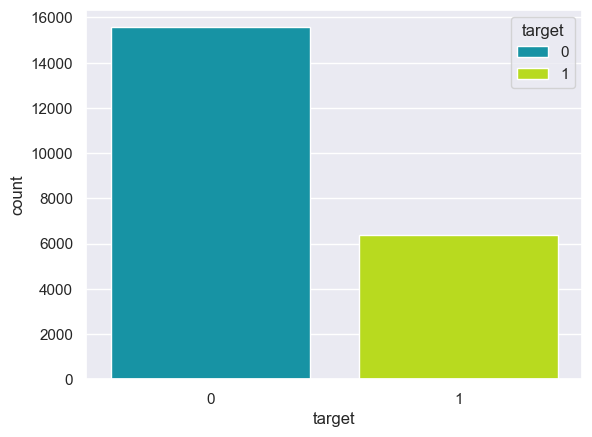

In [32]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 15567), (1, 15567)]


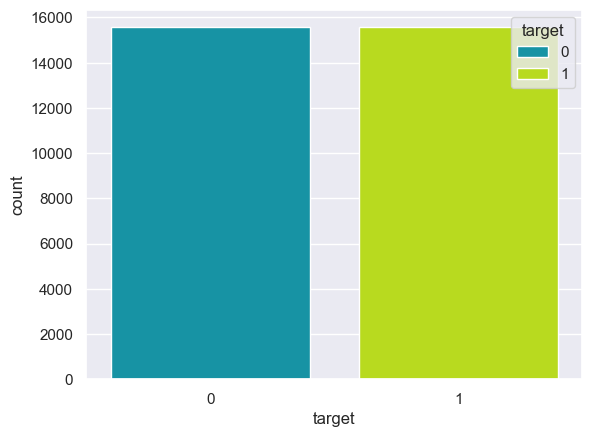

In [33]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Synthetic Minority Oversampling Technique
# smote = SMOTE(random_state=0)
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [34]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (31134, 2)
X_test:   (5500, 2)
y_train:  (31134,)
y_test:   (5500,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="8"></a>

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "XGBoost":XGBClassifier(verbosity=0),
       "K-nearest": KNeighborsClassifier(n_neighbors=3)
       }

In [36]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
4,XGBoost,0.856,0.910,0.789,0.845,0.856
2,RandomForest,0.851,0.920,0.768,0.837,0.851
3,GradientBoost,0.851,0.908,0.782,0.840,0.851
1,Decision,0.831,0.883,0.764,0.819,0.831
5,K-nearest,0.828,0.843,0.807,0.825,0.828
0,SVM,0.808,0.904,0.690,0.783,0.808


[<a href="#content">Back to top</a>]

## Cross-validation  <a name="9"></a>

In [37]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.8851,0.0027,"[0.8815, 0.8879, 0.8883, 0.8824, 0.8852]"
4,XGBoost,0.8850,0.0033,"[0.885, 0.8815, 0.8907, 0.8817, 0.8861]"
5,K-nearest,0.8758,0.0036,"[0.8704, 0.8779, 0.8814, 0.8744, 0.8751]"
3,GradientBoost,0.8731,0.0047,"[0.8794, 0.8666, 0.8768, 0.869, 0.8739]"
1,Decision,0.8511,0.0063,"[0.8424, 0.8568, 0.8591, 0.8462, 0.8513]"
0,SVM,0.8435,0.0033,"[0.8455, 0.8373, 0.8456, 0.8427, 0.8463]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting  <a name="10"></a>

In [39]:
# Evaluate XGBClassifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = XGBClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.821, test: 0.833
>2, train: 0.845, test: 0.853
>3, train: 0.853, test: 0.855
>4, train: 0.867, test: 0.860
>5, train: 0.877, test: 0.859
>6, train: 0.888, test: 0.856
>7, train: 0.896, test: 0.860
>8, train: 0.905, test: 0.855
>9, train: 0.909, test: 0.855
>10, train: 0.914, test: 0.854
>11, train: 0.920, test: 0.853
>12, train: 0.920, test: 0.852
>13, train: 0.925, test: 0.849
>14, train: 0.924, test: 0.849
>15, train: 0.928, test: 0.847
>16, train: 0.928, test: 0.848
>17, train: 0.929, test: 0.849
>18, train: 0.930, test: 0.846
>19, train: 0.931, test: 0.849
>20, train: 0.931, test: 0.847


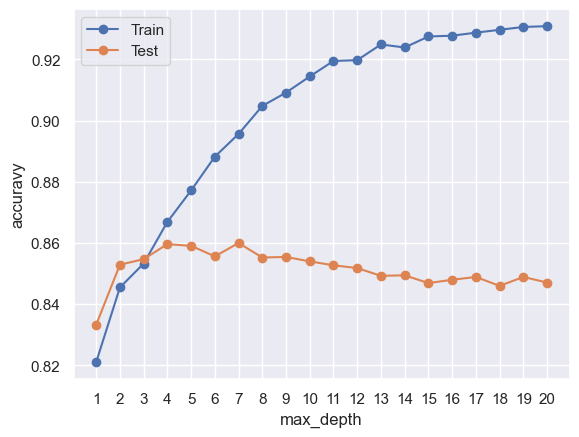

In [40]:
import math

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Hyperparameter tuning  <a name="11"></a>

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [4, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the model
model = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                          cv=5, scoring='accuracy', verbose=2) 
grid_search.fit(X_train, y_train) 

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END 

In [43]:
# Evaluate XGBClassifier on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_= XGBClassifier(max_depth=i,
                       colsample_bytree=1.0,
                       learning_rate=0.3,
                       n_estimators=300,
                       subsample=0.8)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.827, test: 0.840
>2, train: 0.856, test: 0.858
>3, train: 0.869, test: 0.858
>4, train: 0.883, test: 0.859
>5, train: 0.898, test: 0.853
>6, train: 0.909, test: 0.853
>7, train: 0.919, test: 0.850
>8, train: 0.925, test: 0.847
>9, train: 0.929, test: 0.847
>10, train: 0.932, test: 0.843
>11, train: 0.933, test: 0.848
>12, train: 0.934, test: 0.845
>13, train: 0.935, test: 0.843
>14, train: 0.935, test: 0.843
>15, train: 0.935, test: 0.845
>16, train: 0.935, test: 0.844
>17, train: 0.935, test: 0.844
>18, train: 0.935, test: 0.844
>19, train: 0.935, test: 0.843
>20, train: 0.935, test: 0.843


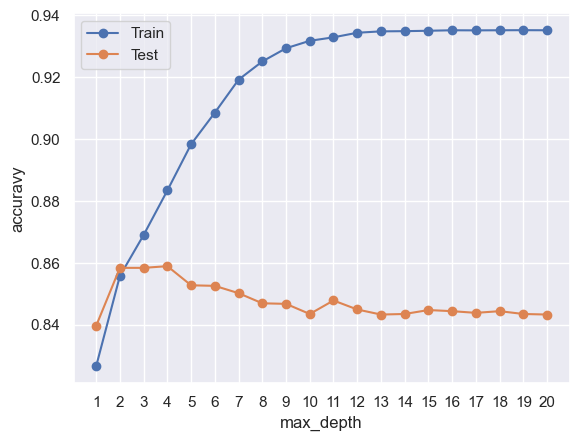

In [44]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [45]:
# ML 
model= XGBClassifier(max_depth=4,
                     colsample_bytree=1.0,
                     learning_rate=0.3,
                     n_estimators=300,
                     subsample=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.859
Precision:  0.91
Recall:  0.797
F1:  0.85
ROC:  0.859


In [46]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.886 0.882 0.89  0.881 0.888]
Mean cross-validation score: 0.885


In [47]:
# Hyperparameter tuning with optuna
import optuna

def objective(trial):
    """
    Objective function for Optuna hyperparameter optimization.

    Args:
        trial: An Optuna trial object.

    Returns:
        The negative accuracy score (to be minimized).
    """
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-3, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    model = XGBClassifier(**params)
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -accuracy  # Optuna minimizes the objective function

# Create a study object
study = optuna.create_study(direction='minimize') 

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Train the model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f"Best Accuracy: {accuracy}")
print(f"Best Hyperparameters: {best_params}")

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-29 11:01:59,407] A new study created in memory with name: no-name-9d5927d7-6048-4512-b519-da147ddf5b76
[I 2024-12-29 11:02:03,596] Trial 0 finished with value: -0.8484934859028413 and parameters: {'max_depth': 6, 'learning_rate': 0.030457715077793938, 'n_estimators': 424, 'subsample': 0.7473220930359091, 'colsample_bytree': 0.8115309952331654, 'gamma': 0.6071391112039495, 'reg_lambda': 0.014982883599710029, 'min_child_weight': 9}. Best is trial 0 with value: -0.8484934859028413.
[I 2024-12-29 11:02:06,337] Trial 1 finished with value: -0.8050683192593976 and parameters: {'max_depth': 3, 'learning_rate': 0.004206275685358439, 'n_estimators': 464, 'subsample': 0.7373275485886254, 'colsample_bytree': 0.95

Best Accuracy: 0.856
Best Hyperparameters: {'max_depth': 10, 'learning_rate': 0.05133112708737439, 'n_estimators': 356, 'subsample': 0.8537278365573938, 'colsample_bytree': 0.8076115597124519, 'gamma': 0.47079566916356813, 'reg_lambda': 0.018370514156021697, 'min_child_weight': 3}


In [49]:
# Evaluate XGBClassifier on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = XGBClassifier(max_depth=i,
                        colsample_bytree=0.8076115597124519,
                        learning_rate=0.05133112708737439,
                        min_child_weight=3,
                        n_estimators=356,
                        subsample=0.8537278365573938,
                        reg_lambda=0.018370514156021697,
                        gamma=0.47079566916356813)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.816, test: 0.827
>2, train: 0.838, test: 0.848
>3, train: 0.845, test: 0.851
>4, train: 0.853, test: 0.858
>5, train: 0.855, test: 0.858
>6, train: 0.856, test: 0.857
>7, train: 0.856, test: 0.856
>8, train: 0.857, test: 0.858
>9, train: 0.857, test: 0.857
>10, train: 0.856, test: 0.856
>11, train: 0.857, test: 0.857
>12, train: 0.856, test: 0.856
>13, train: 0.856, test: 0.857
>14, train: 0.856, test: 0.857
>15, train: 0.856, test: 0.856
>16, train: 0.857, test: 0.856
>17, train: 0.857, test: 0.857
>18, train: 0.856, test: 0.857
>19, train: 0.856, test: 0.857
>20, train: 0.856, test: 0.857


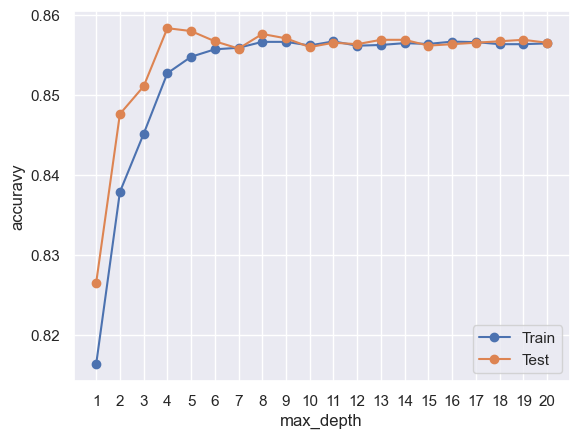

In [50]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [51]:
# ML 
model = XGBClassifier(max_depth=8,
                      colsample_bytree=0.8076115597124519,
                      learning_rate=0.05133112708737439,
                      min_child_weight=3,
                      n_estimators=356,
                      subsample=0.8537278365573938,
                      reg_lambda=0.018370514156021697,
                      gamma=0.47079566916356813)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.858
Precision:  0.91
Recall:  0.793
F1:  0.848
ROC:  0.858


In [52]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.884 0.872 0.885 0.88  0.882]
Mean cross-validation score: 0.881


[<a href="#content">Back to top</a>]

## Final ML model  <a name="12"></a>

In [53]:
# ML with hyperparameters sugested by the grid search 
model= XGBClassifier(max_depth=4,
                     colsample_bytree=1.0,
                     learning_rate=0.3,
                     n_estimators=300,
                     subsample=0.8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.859
Precision:  0.91
Recall:  0.797
F1:  0.85
ROC:  0.859


In [54]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.886 0.882 0.89  0.881 0.888]
Mean cross-validation score: 0.885


[<a href="#content">Back to top</a>]

## Plot the learning curve and AUC <a name="13"></a>

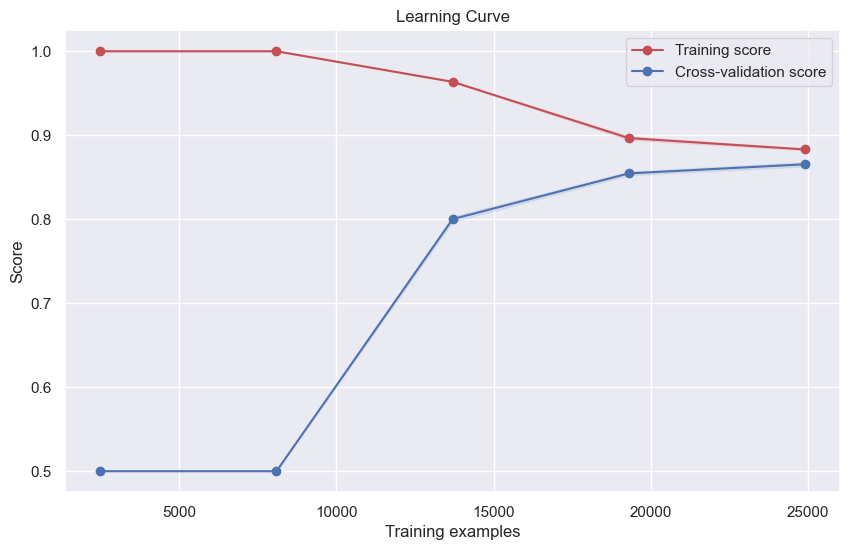

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="b",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

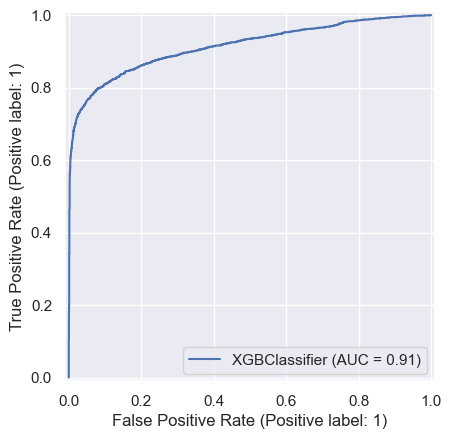

In [56]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix, classification report <a name="14"></a>

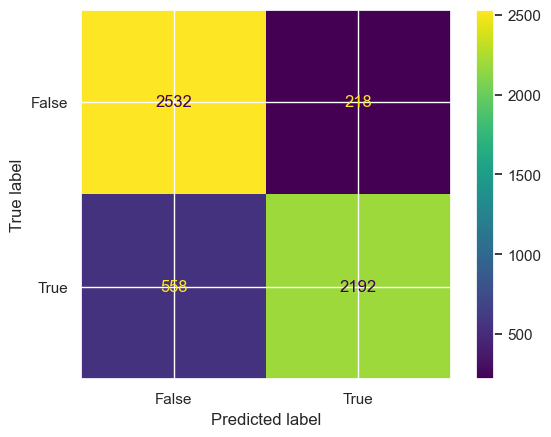

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = model.fit(X_train, y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [58]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.82      0.92      0.87      2750
Inactive (target 0)       0.91      0.80      0.85      2750

           accuracy                           0.86      5500
          macro avg       0.86      0.86      0.86      5500
       weighted avg       0.86      0.86      0.86      5500



[<a href="#content">Back to top</a>]